In [1]:
from IPython.core.display import HTML

In [2]:
HTML('''
<!DOCTYPE html>
<html>
    <head>
    </head>
    <body>
        <h1>
            My favorite tv show is tv {{ show }}
        </h1>
    </body>
<html>
''')

In [3]:
import re
from collections import defaultdict
import string
import pandas as pd

In [4]:
file = open("data/MCTest/mc160.train.txt", "r") 
obj= (file.read())
splitss=(obj.split('***************************************************'))

In [5]:
df2 = pd.DataFrame(index=range(len(splitss)),
                   columns=['id', 'author', 'story'])

In [6]:
for i in range(1,len(splitss)):
  a=(splitss[i].split('\n')[1].strip())
  title=a.replace('Story:','')
  title=title.replace(' ','')
  df2['id'][i-1]=title

  b=(splitss[i].split('\n')[2].strip())
  author=b.replace('Author:','')
  author=author.replace(' ','')

  df2['author'][i-1]=author
  c=(splitss[i].split('\n')[3].strip())
  work_time=c.replace('Work Time(s):','')
  work_time=work_time.replace(' ','')

  story=(splitss[i].split(':')[3].strip())
  story=story.replace(work_time,'')
  story=story.replace('1','')
  story=story.replace('\n',' ')
  story=story.replace('\t',' ')
  df2['story'][i-1]=story#word_tokenize(remove_punct(story).lower())
  #print (story)

In [7]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
from nltk import word_tokenize, WordNetLemmatizer

In [8]:
file=open('mfd.txt').read().strip()
file=file.split('%')

In [9]:
########### MFD categories to dict ############# 
cat=re.sub('\s+',' ',file[1]).split()
i=0
mfd_symb=[]
mfd=defaultdict(lambda: 'pppppppppppppppppppppppppppp')
while i<len(cat):
    mfd[cat[i]]=cat[i+1]
    mfd_symb.append(cat[i])
    i=i+2

In [10]:
########### MFD vocablary #########
mfd_words=defaultdict(lambda:[])
words=file[2].split('\n')
for w in words:
    if w.strip()!='':
        w=re.sub('\s+',' ',w)
        w=w.replace('*','')
        w=w.split()
        mfd_words[w[0]].extend(w[1:])

In [11]:
def remove_punct(value):
    result=''
    for c in value:
        if c not in string.punctuation:
            result+=c
    return result

In [12]:
def find_story_moral(stry,mfd_words,mfd_symb):
    stry=word_tokenize(remove_punct(stry).lower())
    story=[]
    for t in stry:
        t=WordNetLemmatizer().lemmatize(t)
        t=WordNetLemmatizer().lemmatize(t, pos='v')
        if t not in stoplist:
            story.append(t)
    moral=defaultdict(lambda:0)
    vocab=mfd_words.keys()
    for w in story:
        if w in vocab:
            categ=mfd_words[w]
            for c in categ:
                moral[c]=moral[c]+1
    if (len(moral.keys())>0):
        return mfd[max(moral,key=moral.get)]
    return 'no moral found'

In [13]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
from nltk import word_tokenize, WordNetLemmatizer
import string
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.signal

In [14]:
url = 'http://www.plosone.org/article/fetchSingleRepresentation.action?uri=info:doi/10.1371/journal.pone.0026752.s001'
labmt = pd.read_csv(url, skiprows=2, sep='\t', index_col=0)

In [15]:
def sample_happiness(sample):
  happiness=0
  word,freq=np.unique(sample,return_counts=True)
  total=np.float(sum(freq))
  for w in sample:
    hap=labmt.happiness_average.get(w)
    if hap:
      happiness+=labmt.happiness_average.get(w)*freq[np.where(word == w)][0]/total
  return happiness

('ssssss', 30)
30
11
40
141
('pppp ', 6)
15


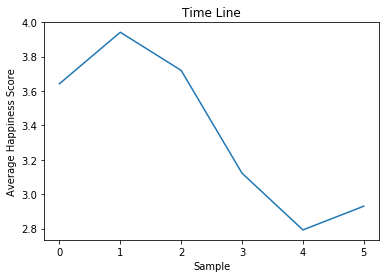

In [16]:
stry=df2['story'][2]
stop_words = set(stopwords.words('english'))
stry=word_tokenize(stry.lower())
story=[]
for w in stry:
  if w not in stop_words:
    story.append(remove_punct(w))
#print (len(story))
#print (story)
timeseries_len=10
window_size=15
text_len=len(story)
#print (story[0:16])
#for i in story[0:16]:
  #print (i)
  #print (labmt.happiness_average.get(i))
#sample_len=math.ceil((text_len-(window_size+1))/timeseries_len)
sample_len=30
#sample_len=int(math.ceil((text_len-(window_size+1))/timeseries_len))
print ('ssssss',sample_len)
sample_overlap=int(math.ceil((text_len-sample_len-1)/timeseries_len))
print (sample_len)
print (sample_overlap)
print (sample_len+timeseries_len)
print (text_len)
sample_st=0
y=[]

while (sample_st+sample_len)<=text_len:
  sample_st=sample_st+sample_len-sample_overlap
  #print (sample_happiness(story[sample_st:sample_st+sample_len]))
  y.append(sample_happiness(story[sample_st:sample_st+sample_len]))
print ('pppp ',len(y))
print (window_size)
y_at=scipy.signal.savgol_filter(np.ravel(y), 3, 1)
plt.plot(np.arange(0,len(y)),y_at)
plt.ylabel('Average Happiness Score')
plt.xlabel('Sample')
plt.title('Time Line')
plt.show()


In [17]:
plt.plot(np.arange(0,len(y)),y)

In [19]:
import pandas as pd
import numpy as np
import bokeh.charts as bc
from bokeh.resources import CDN
from bokeh.embed import components
from matplotlib.pyplot import figure
import mpld3

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# some data (512x512)
import scipy.misc
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [22]:
import mpld3

In [29]:
from flask import Flask,render_template,request
#from io import UnsupportedOperation
#import click
app = Flask(__name__)
num=0
@app.route('/')
def index():
    ########## Iterating Over Stories ###################
    tv_show="Family Guy"
    return render_template("index.html", show=tv_show)

@app.route('/ind2')
def ind2():
    %tb
    f=[]
    for ind in range(1,len(df2)):
        f.append(ind)
    #print (f)
    return render_template("ind2.html",f=f)
@app.route('/storydisplay',methods = ['POST', 'GET'])
def story_display():
    #if request.method == 'POST':
    no=int(request.form['delete'])
    num=no
    #print ('ppppppppppp',request.form['delete'])
    story=df2['story'][no-1]
    morall= (find_story_moral(story,mfd_words,mfd_symb))
    return render_template("story_display.html",no=no-1,story=story,moral=morall)
@app.route('/moral', methods = ['POST' , 'GET'])
def moral():
    print ("i dddddddddddddddddd sssssssssssss")
    no=int(request.form['delete'])
    num=no
    print ('moooooooo ',no)
    story=df2['story'][no]
    st=word_tokenize(remove_punct(story).lower())
    #print ('ppppppppppp',request.form['delete'])
    vocab=mfd_words.keys()
    catt=[]
    for w in st:
        if w in vocab:
            categ=mfd_words[w]
            print('cattttttt ',w)
            catt.append(w)
    morall= (find_story_moral(story,mfd_words,mfd_symb))
    return render_template("moral.html",no=no,story=story,moral=morall,st=st,catt=catt)
    #return render_template("moral.html",no=num)
@app.route('/graph', methods = ['POST' , 'GET'])
def graph():
    # Build the dataframe
    plt.close("all")
    no=int(request.form['delete'])
    print ('nooooooooooooo ',no)
    num=no
    stry=df2['story'][no]
    stop_words = set(stopwords.words('english'))
    stry=word_tokenize(stry.lower())
    story=[]
    for w in stry:
      if w not in stop_words:
        story.append(remove_punct(w))
    #print (len(story))
    #print (story)
    timeseries_len=10
    window_size=15
    text_len=len(story)
    sample_len=30
    sample_overlap=int(math.ceil((text_len-sample_len-1)/timeseries_len))
    sample_st=0
    y=[]
    
    while (sample_st+sample_len)<=text_len:
      sample_st=sample_st+sample_len-sample_overlap
      #print (sample_happiness(story[sample_st:sample_st+sample_len]))
      y.append(sample_happiness(story[sample_st:sample_st+sample_len]))
    #print ('pppp ',len(y))
    #print (window_size)
    #y_at=scipy.signal.savgol_filter(np.ravel(y), 3, 1)
    plt.plot(np.arange(0,len(y)),y)
    plt.ylabel('Average Happiness Score')
    plt.xlabel('Sample')
    plt.title('Time Line')
    #plt.show()
    
    #plt.plot([1,2,3])
    plt.savefig('myfig')
    
    ##### correct #####333
    #plugins.connect(fig, plugins.MousePosition(fontsize=14))
    mpld3.show()
    #plt.close()
    #fig = plt.show()
    
    #plt.savefig('book.png')
    #pylab.savefig('foo.png')
    #savefig('foo.png')
    #mpld3.show(fig)
    #mpld3.show('myfig')
    
    '''    print ("i dddddddddddddddddd sssssssssssss graphhhhhhhhhhhhhhhhh")
        fig.savefig('my_plot.png')
    '''    
    #morall= (find_story_moral(story,mfd_words,mfd_symb))
    return render_template("graph.html",p=plt)

@app.route('/tuna')
def tuna():
    tv_show=[]
    c=0
    for i in range(len(df2)):
        #print('story',i)
        stry=df2['story'][i]
        print(df2['story'][i])
        morall= (find_story_moral(stry,mfd_words,mfd_symb))
        if (morall=='no moral found'):
            c+=1
        tv_show[i]=morall
    return '<h2> Tunaaa is </h2>'


if __name__ == "__main__":
    app.run()
    #app.run(host='127.0.0.1',port=80,debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Dec/2018 13:52:49] "GET / HTTP/1.1" 200 -
No traceback available to show.
127.0.0.1 - - [06/Dec/2018 13:52:51] "GET /ind2 HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2018 13:52:55] "POST /storydisplay HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2018 13:52:57] "POST /moral HTTP/1.1" 200 -


i dddddddddddddddddd sssssssssssss
('moooooooo ', 1)
('nooooooooooooo ', 1)

Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8954/    [Ctrl-C to exit]


127.0.0.1 - - [06/Dec/2018 13:52:59] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2018 13:52:59] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2018 13:53:00] "GET /mpld3.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2018 13:53:00] code 404, message Not Found
127.0.0.1 - - [06/Dec/2018 13:53:00] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [06/Dec/2018 13:53:14] "POST /storydisplay HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2018 13:53:16] "POST /moral HTTP/1.1" 200 -


i dddddddddddddddddd sssssssssssss
('moooooooo ', 2)
('cattttttt ', 'care')
('nooooooooooooo ', 2)

Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8966/    [Ctrl-C to exit]


127.0.0.1 - - [06/Dec/2018 13:53:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2018 13:53:18] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2018 13:53:19] "GET /mpld3.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2018 13:53:19] code 404, message Not Found
127.0.0.1 - - [06/Dec/2018 13:53:19] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [06/Dec/2018 13:53:29] "POST /storydisplay HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2018 13:53:31] "POST /moral HTTP/1.1" 200 -


i dddddddddddddddddd sssssssssssss
('moooooooo ', 3)
('nooooooooooooo ', 3)

Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8979/    [Ctrl-C to exit]


127.0.0.1 - - [06/Dec/2018 13:53:34] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2018 13:53:34] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2018 13:53:34] "GET /mpld3.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2018 13:53:34] code 404, message Not Found
127.0.0.1 - - [06/Dec/2018 13:53:34] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:

    df = pd.DataFrame({
    'x': 2*np.pi*i/100,
    'sin': np.sin(2*np.pi*i/100),
    'cos': np.cos(2*np.pi*i/100),
    } for i in range(0,101))
    
    # Create the plot
    plot = bc.Line(title='Triganometric fun!',
    data=df, x='x', ylabel='y')

    # Generate the script and HTML for the plot
    script, div = components(plot)

    # Return the webpage
    return """
    <!doctype html>
    <head>
    <title>My wonderful trigonometric webpage</title>
    {bokeh_css}
    </head>
    <body>
    <h1>Everyone loves trig!
    {div}

    {bokeh_js}
    {script}
    </body>
    """.format(script=script, div=div, bokeh_css=CDN.render_css(),
    bokeh_js=CDN.render_js())
